In [5]:
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
jordan = pd.read_csv("jordan_career.csv")
lebron = pd.read_csv("lebron_career.csv")

###
pd.set_option('display.max_rows', jordan.shape[0]+1)
pd.set_option('display.max_rows', lebron.shape[0]+1)
pd.set_option('display.max_columns', jordan.shape[1]+1)
pd.set_option('display.max_columns', lebron.shape[1]+1)
###

jordan.drop(["game", "date", "team", "opp", "minus_plus"], axis=1, inplace=True) 
lebron.drop(["game", "date", "team", "opp", "minus_plus"], axis=1, inplace=True) 

jordan["threep"] = jordan["threep"].fillna(0)
lebron["threep"] = lebron["threep"].fillna(0)

jordan["ftp"] = jordan["ftp"].fillna(0)
lebron["ftp"] = lebron["ftp"].fillna(0)

jordan["result"] = [int(res.split(" ")[1][1:-1]) for res in jordan["result"]]
lebron["result"] = [int(res.split(" ")[1][1:-1]) for res in lebron["result"]]

t_age = lambda a, b: a + b / 365
jordan["age"] = [t_age(*[int(i) for i in age.split("-")]) for age in jordan["age"]]
lebron["age"] = [t_age(*[int(i) for i in age.split("-")]) for age in lebron["age"]]

t_time = lambda a, b: a + b / 60
jordan["mp"] = [t_time(*[int(i) for i in m.split(":")]) for m in jordan["mp"]]
lebron["mp"] = [t_time(*[int(i) for i in m.split(":")]) for m in lebron["mp"]]

In [3]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

js = standarize(jordan)
ls = standarize(lebron)

### non standarized linear regression model

In [4]:
jsize = jordan.shape[0]
X_jordan = jordan[["age", "result", "mp", "fg", "fga", "fgp", "three", "threeatt", "threep", "ft", "fta", "ftp", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pts"]]
y_jordan = jordan["game_score"]
X_train_j = X_jordan[:int(jsize*0.6)]
y_train_j = y_jordan[:int(jsize*0.6)]
X_test_j = X_jordan[int(jsize*0.6):int(jsize*0.8)]
y_test_j = y_jordan[int(jsize*0.6):int(jsize*0.8)]
X_cross_j = X_jordan[int(jsize*0.8):]
y_cross_j = y_jordan[int(jsize*0.8):]

lsize = lebron.shape[0]
X_lebron = lebron[["age", "result", "mp", "fg", "fga", "fgp", "three", "threeatt", "threep", "ft", "fta", "ftp", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pts"]]
y_lebron = lebron["game_score"]
X_train_l = X_lebron[:int(jsize*0.6)]
y_train_l = y_lebron[:int(jsize*0.6)]
X_test_l = X_lebron[int(jsize*0.6):int(jsize*0.8)]
y_test_l = y_lebron[int(jsize*0.6):int(jsize*0.8)]
X_cross_l = X_lebron[int(jsize*0.8):]
y_cross_l = y_lebron[int(jsize*0.8):]

In [6]:
regr_jordan = linear_model.LinearRegression()
regr_jordan.fit(X_train_j, y_train_j) 

print ('\nCoefs (per dim) ', regr_jordan.coef_, ' and intercept: ', regr_jordan.intercept_)

print ('\nTraining Score:', regr_jordan.score(X_train_j, y_train_j) )
print ('Testing Score:', regr_jordan.score(X_test_j, y_test_j) )
print ('\nTraining MSE: ', np.mean((regr_jordan.predict(X_train_j) - y_train_j)**2))
print ('Testing MSE: ', np.mean((regr_jordan.predict(X_test_j) - y_test_j)**2))


Coefs (per dim)  [ 0.04581011  0.00316263 -0.02762215  0.34371023 -0.73175504 -1.86309188
  0.07300259 -0.06799796 -0.22033934  0.30467866 -0.38266728  0.18582104
  0.37499931 -0.03488572  0.34011358  0.69922455  1.01041767  0.72456767
 -1.01206531  1.06510171]  and intercept:  -0.561635467854682

Training Score: 0.9967889565452203
Testing Score: 0.9963052176912673

Training MSE:  0.2544597185359222
Testing MSE:  0.24239841607495954


<IPython.core.display.Javascript object>


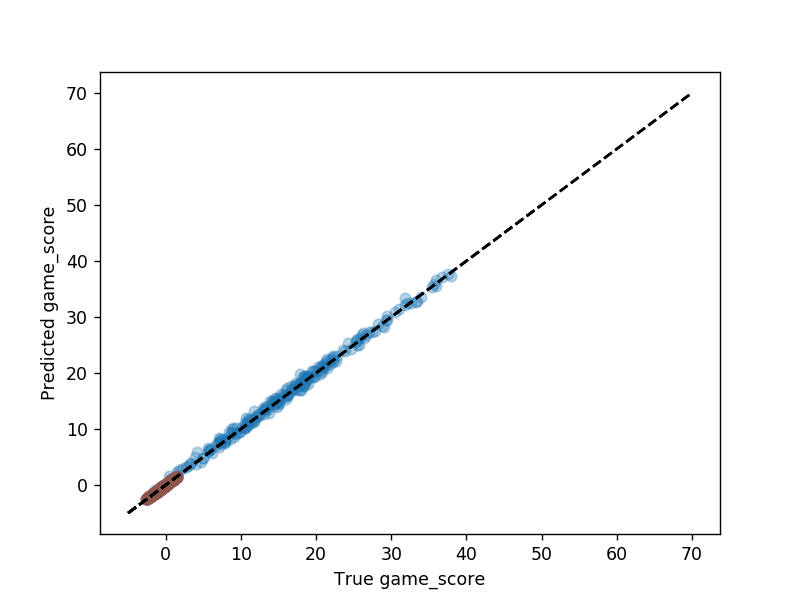

Text(0, 0.5, 'Predicted game_score')

In [8]:
# Visualization of target and predicted responses
clf = linear_model.LinearRegression()
clf.fit(X_train_j, y_train_j)
predicted = clf.predict(X_cross_j)
plt.scatter(y_cross_j, predicted, alpha = 0.3)
plt.plot([-5, 50], [-5, 50], '--k')
plt.axis('tight')
plt.xlabel('True game_score')
plt.ylabel('Predicted game_score')

### standarized linear regression model

In [17]:
jsize = js.shape[0]
X_jordan = js[["age", "result", "mp", "fg", "fga", "fgp", "three", "threeatt", "threep", "ft", "fta", "ftp", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pts"]]
y_jordan = js["game_score"]
X_train_j = X_jordan[:int(jsize*0.6)]
y_train_j = y_jordan[:int(jsize*0.6)]
X_test_j = X_jordan[int(jsize*0.6):int(jsize*0.8)]
y_test_j = y_jordan[int(jsize*0.6):int(jsize*0.8)]
X_cross_j = X_jordan[int(jsize*0.8):]
y_cross_j = y_jordan[int(jsize*0.8):]

lsize = ls.shape[0]
X_lebron = ls[["age", "result", "mp", "fg", "fga", "fgp", "three", "threeatt", "threep", "ft", "fta", "ftp", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pts"]]
y_lebron = ls["game_score"]
X_train_l = X_lebron[:int(jsize*0.6)]
y_train_l = y_lebron[:int(jsize*0.6)]
X_test_l = X_lebron[int(jsize*0.6):int(jsize*0.8)]
y_test_l = y_lebron[int(jsize*0.6):int(jsize*0.8)]
X_cross_l = X_lebron[int(jsize*0.8):]
y_cross_l = y_lebron[int(jsize*0.8):]

In [18]:
regr_jordan = linear_model.LinearRegression()
regr_jordan.fit(X_train_j, y_train_j) 

print ('\nCoefs (per dim) ', regr_jordan.coef_, ' and intercept: ', regr_jordan.intercept_)

print ('\nTraining Score:', regr_jordan.score(X_train_j, y_train_j) )
print ('Testing Score:', regr_jordan.score(X_test_j, y_test_j) )
print ('\nTraining MSE: ', np.mean((regr_jordan.predict(X_train_j) - y_train_j)**2))
print ('Testing MSE: ', np.mean((regr_jordan.predict(X_test_j) - y_test_j)**2))


Coefs (per dim)  [ 0.02585891  0.00427128 -0.01662072  0.54424216 -0.45785169 -0.02135976
  0.05889714 -0.01256416 -0.00721604  0.34692122 -0.18676634  0.0041181
  0.07877961  0.02931342  0.06264126  0.20067048  0.17640849  0.07722873
 -0.18492842  0.57787105]  and intercept:  0.005622084455441045

Training Score: 0.9967889565452204
Testing Score: 0.9963052176912673

Training MSE:  0.002827159144216972
Testing MSE:  0.0026931527806955623


In [19]:
# Visualization of target and predicted responses
clf = linear_model.LinearRegression()
clf.fit(X_train_j, y_train_j)
predicted = clf.predict(X_cross_j)
plt.scatter(y_cross_j, predicted, alpha = 0.3)
plt.plot([-5, 10], [-5, 10], '--k')
plt.axis('tight')
plt.xlabel('True game_score')
plt.ylabel('Predicted game_score')

Text(58.777777777777786, 0.5, 'Predicted game_score')